# Exploration Data Analisys

## Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100)     
pd.set_option('display.width', 1000)      

### Load dataset

In [ ]:
try:
    df = pd.read_csv('../resources/dataset/NF-UNSW-NB15-v3.csv')
    print('Dataset loaded')
except FileNotFoundError:
    print('File not found. Remember to place the dataset in resources/dataset')

Dataset loaded


### Dataset Shape

In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print(df.head().T)

null_vals = df.isnull().sum()
print("\nMissing values per column (none for other columns):")
print(null_vals[null_vals > 0])

#print("\nDataset infos:") #Too long
#print(dataset.info())

Number of rows: 2365424
Number of columns: 55
                                         0              1              2              3              4
FLOW_START_MILLISECONDS      1424242193040  1424242192744  1424242190649  1424242193145  1424242193239
FLOW_END_MILLISECONDS        1424242193043  1424242193079  1424242193109  1424242193146  1424242193241
IPV4_SRC_ADDR                   59.166.0.2     59.166.0.4     59.166.0.0     59.166.0.8     59.166.0.1
L4_SRC_PORT                           4894          52671          47290          43310          45870
IPV4_DST_ADDR                149.171.126.3  149.171.126.6  149.171.126.9  149.171.126.7  149.171.126.1
L4_DST_PORT                             53          31992           6881             53             53
PROTOCOL                                17              6              6             17             17
L7_PROTO                               5.0           11.0           37.0            5.0            5.0
IN_BYTES                   

### Target variable analysis

In [ ]:
attack_cat = df['Attack']

print("Attack categories:")
print(attack_cat.unique())

Attack categories:
['Benign' 'Fuzzers' 'Exploits' 'Backdoor' 'Reconnaissance' 'Generic' 'DoS'
 'Shellcode' 'Analysis' 'Worms']


In [9]:
print("Distribution of attacks categories:")
print(attack_cat.value_counts(normalize=True) * 100)

Distribution of attacks categories:
Attack
Benign            94.601687
Exploits           1.807202
Fuzzers            1.429596
Generic            0.830760
Reconnaissance     0.721816
DoS                0.252809
Backdoor           0.196963
Shellcode          0.100658
Analysis           0.051830
Worms              0.006680
Name: proportion, dtype: float64


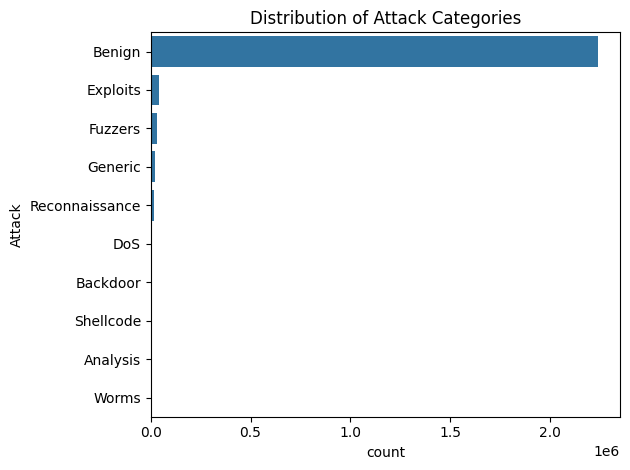

In [ ]:
plt.figure()
malicious = attack_cat[attack_cat != 'Benign']
sbn.countplot(y='Attack', data=df, order = attack_cat.value_counts().index)
plt.title('Distribution of Attack Categories except Benign')
plt.tight_layout()
plt.show()

In [ ]:
print("Distribution of targer variable (label):")
print(df['Label'].value_counts(normalize=True) * 100)

Distribution of targer variable (label):
Label
0    94.601687
1     5.398313
Name: proportion, dtype: float64
